<a href="https://colab.research.google.com/github/Himanshu-Dharma/master-thesis-feature-extraction-and-sentiment-analysis-using-deep-learning/blob/main/Thesis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description


1. **reviewerID** - ID of the reviewer, e.g. A2SUAM1J3GNN3B
2. **asin** - ID of the product, e.g. 0000013714
3. **reviewerName** - name of the reviewer
4. **vote** - helpful votes of the review
5. **style** - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
6. **reviewText** - text of the review
7. **overall** - rating of the product
8. **summary** - summary of the review
9. **unixReviewTime** - time of the review (unix time)
10. **reviewTime** - time of the review (raw)
11. **image** - images that users post after they have received the product

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Loading the data

In [3]:
df_primary = pd.read_json("/content/drive/MyDrive/ThesisData/thesis_data_primary.json")

# Exploratory Data Analysis

In [4]:
df_primary.head(2)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,90,False,"08 9, 2004",AXHY24HWOF184,0470536454,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,1092009600,NaN
1,4,2,True,"04 6, 2017",A29OWR79AM796H,0470536454,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,1491436800,NaN


## Checking for Null values

In [5]:
#total number of rows and coluns in our dataset
df_primary.shape

(1512530, 12)

In [6]:
#Total number of null values per column
df_primary.isnull().sum()

overall                 0
vote              1268582
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              839992
reviewerName          150
reviewText            855
summary               380
unixReviewTime          0
image             1482365
dtype: int64

##Rating(star) Distribution

In [7]:
df_overall = df_primary['overall'].value_counts()
df_overall = df_overall.reset_index()
df_overall.columns = ['Rating', 'Count']
df_overall

,Rating,Count
0,5,984097
1,4,237295
2,1,118102
3,3,106249
4,2,66787


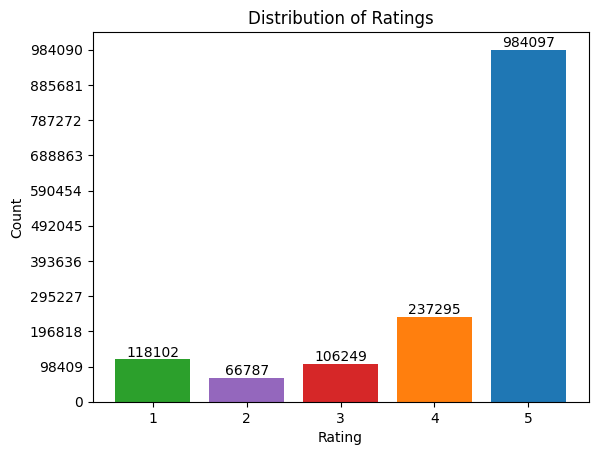

In [8]:
plt.bar(df_overall['Rating'], df_overall['Count'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

# Adding numbers on top of each bar
for i, value in enumerate(df_overall['Count']):
    plt.annotate(str(value), (df_overall['Rating'][i], value), ha='center', va='bottom')

# Setting the y-axis tick interval as the values in the data are > 100000
plt.yticks(range(0, max(df_overall['Count']), int(max(df_overall['Count'])/10)))

# Displaying the graph
plt.show()

## Word cloud

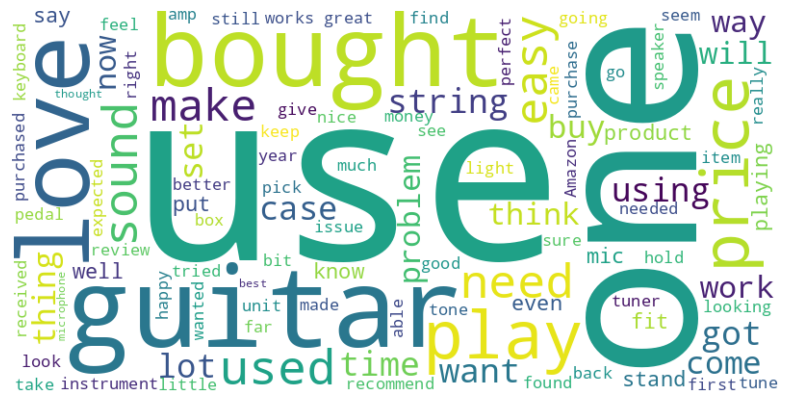

In [9]:
#Word cloud
from wordcloud import WordCloud

#text column
df_primary['reviewText'] = df_primary['reviewText'].astype(str)
text_data = ' '.join(df_primary['reviewText'])

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text_data)

# Displaying the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Unique product reviews



**112222** Unique products are reviewed, and most reviewed product contains **5082** reviews.

In [10]:
products = df_primary.asin
products.value_counts()

B000VSM4MS    5082
B004XNK7AI    4704
B00IFOTSJW    4110
B000XI6O2W    3924
B00XQFONF4    3901
              ... 
B00GFRHD5W       1
B00GFUU1IA       1
B00GFU9PC8       1
B0029BS3GG       1
B01HJEFFTK       1
Name: asin, Length: 112222, dtype: int64

In [11]:
df_primary['reviewTime'] = pd.to_datetime(df_primary['reviewTime'], format='%m %d, %Y')

## Unique users

**903330** Unique Users posted reviews, and user with most reviews posted **506** reviews.

In [12]:
user = df_primary.reviewerID
user.value_counts()

A2NYK9KWFMJV4Y    506
A3YVD62FSVIUJ     275
A396ELNTQDFYPO    226
ADH0O8UVJOT10     193
ALHC64J88LVWO     151
                 ... 
A3KIXS1TR8C178      1
AV4FOTICGNCKH       1
AXXPHF223THY6       1
A2U49PHFCOZGAC      1
A3HAXIG8WVVDB7      1
Name: reviewerID, Length: 903330, dtype: int64

## Labeling positive and negative reviews

# Preprocessing the Data

## Libraries

In [13]:
from bs4 import BeautifulSoup
import spacy
import gensim.downloader as api

## Data cleaning

### Missing values

In [14]:
import pandas as pd

# Assuming df is your DataFrame and 'column_name' is the name of the column to check
threshold = 0.55  # Set the threshold as 55%

for cname in df_primary:
  missing_percentage = df_primary[cname].isnull().mean()  # Calculate the percentage of missing values
  if missing_percentage >= threshold:
    print("The column has {}% or more missing values.".format(missing_percentage * 100))
  else:
    print("The column has less than {}% missing values.".format(threshold * 100))

The column has less than 55.00000000000001% missing values.
The column has 83.87152651517655% or more missing values.
The column has less than 55.00000000000001% missing values.
The column has less than 55.00000000000001% missing values.
The column has less than 55.00000000000001% missing values.
The column has less than 55.00000000000001% missing values.
The column has 55.53555962526363% or more missing values.
The column has less than 55.00000000000001% missing values.
The column has less than 55.00000000000001% missing values.
The column has less than 55.00000000000001% missing values.
The column has less than 55.00000000000001% missing values.
The column has 98.00565939187983% or more missing values.


In [15]:
df_new = df_primary.drop(columns=['vote','style','image'])

In [16]:
# Assuming df is your DataFrame and 'column_name' is the name of the column with missing values
column_name1 = 'reviewText'

# Remove rows with missing values in the specified column
df_new = df_new.dropna(subset=[column_name1])

# Display the cleaned DataFrame
print(df_new)

         overall  verified reviewTime      reviewerID        asin  \
0              5     False 2004-08-09   AXHY24HWOF184  0470536454   
1              4      True 2017-04-06  A29OWR79AM796H  0470536454   
2              5      True 2017-03-14   AUPWU27A7X5F6  0470536454   
3              4      True 2017-02-14  A1N69A47D4JO6K  0470536454   
4              5      True 2017-01-29   AHTIQUMVCGBFJ  0470536454   
...          ...       ...        ...             ...         ...   
1512525        5      True 2018-06-11  A311NUWMD55WPO  B01HJETSF2   
1512526        4      True 2018-06-07   AXJFL8T55OXJG  B01HJETSF2   
1512527        5      True 2018-06-03  A1RHBI07JTQBER  B01HJETSF2   
1512528        5      True 2018-05-29  A1V0G9QMGY1RGK  B01HJETSF2   
1512529        5      True 2018-05-01  A25QCPUGH19GZU  B01HJETSF2   

                reviewerName  \
0                      Bendy   
1            Amazon Customer   
2            Amazon Customer   
3        Christopher Burnett   
4          

In [17]:
df_new.shape

(1512530, 9)

In [18]:
df_primary.shape

(1512530, 12)

In [19]:
df_clean = df_new.drop(columns=['reviewerName','summary'])

In [20]:
df_clean.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,unixReviewTime
0,5,False,2004-08-09,AXHY24HWOF184,0470536454,Crocheting for Dummies by Karen Manthey & Susa...,1092009600
1,4,True,2017-04-06,A29OWR79AM796H,0470536454,Very helpful...,1491436800
2,5,True,2017-03-14,AUPWU27A7X5F6,0470536454,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,1489449600
3,4,True,2017-02-14,A1N69A47D4JO6K,0470536454,My girlfriend use quite often,1487030400
4,5,True,2017-01-29,AHTIQUMVCGBFJ,0470536454,Arrived as described. Very happy.,1485648000


### Duplicates

In [21]:
total_duplicates = df_clean.duplicated().sum()

# Display the number of total duplicate rows
print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 37619


In [22]:
duplicate_rows1 = df_clean[df_clean.duplicated(keep=False)]


In [23]:
duplicate_rows1

,overall,verified,reviewTime,reviewerID,asin,reviewText,unixReviewTime
3919,5,True,2015-01-08,AH91ZJ8W8NCLR,B00005ML71,A+,1420675200
3920,5,True,2015-01-08,AH91ZJ8W8NCLR,B00005ML71,A+,1420675200
4888,5,True,2014-04-30,A10NPIQCB07BXZ,B000068NUQ,The metal connectors have a quality look. They...,1398816000
4889,5,True,2014-04-30,A10NPIQCB07BXZ,B000068NUQ,The metal connectors have a quality look. They...,1398816000
5026,5,True,2015-03-18,A1Y90O3KRCENSW,B000068NTU,"Great product, performed as advertised.",1426636800
...,...,...,...,...,...,...,...
1491971,5,True,2018-07-26,A3IJSAWNZA89IF,B01C5S15H6,Great quality and looks stunning.,1532563200
1491972,5,True,2018-07-26,A3IJSAWNZA89IF,B01C5S15H6,Great quality and looks stunning.,1532563200
1491973,5,True,2018-07-26,A3IJSAWNZA89IF,B01C5S15H6,Great quality and looks stunning.,1532563200
1504749,1,True,2017-03-17,A1QOF7FTFHVU22,B01FDHB9AY,does not fit the epiphone,1489708800


In [24]:
# The keep='first' parameter specifies to keep the first occurrence of each duplicated row and remove the subsequent duplicates.
df_clean_no_dups = df_clean.drop_duplicates(keep='first')

In [25]:
df_clean_no_dups['overall'].value_counts()

5    960812
4    230948
1    114729
3    103417
2     65005
Name: overall, dtype: int64

In [26]:
df_clean_no_dups

,overall,verified,reviewTime,reviewerID,asin,reviewText,unixReviewTime
0,5,False,2004-08-09,AXHY24HWOF184,0470536454,Crocheting for Dummies by Karen Manthey & Susa...,1092009600
1,4,True,2017-04-06,A29OWR79AM796H,0470536454,Very helpful...,1491436800
2,5,True,2017-03-14,AUPWU27A7X5F6,0470536454,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,1489449600
3,4,True,2017-02-14,A1N69A47D4JO6K,0470536454,My girlfriend use quite often,1487030400
4,5,True,2017-01-29,AHTIQUMVCGBFJ,0470536454,Arrived as described. Very happy.,1485648000
...,...,...,...,...,...,...,...
1512525,5,True,2018-06-11,A311NUWMD55WPO,B01HJETSF2,Hard to believe anyone will play their prized ...,1528675200
1512526,4,True,2018-06-07,AXJFL8T55OXJG,B01HJETSF2,"Straplocks installed nicely, good fitment on m...",1528329600
1512527,5,True,2018-06-03,A1RHBI07JTQBER,B01HJETSF2,Great Product,1527984000
1512528,5,True,2018-05-29,A1V0G9QMGY1RGK,B01HJETSF2,I honestly expected these to be cheap pieces o...,1527552000


### Removing HTML Tags

In [27]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

### Removing Punctuation

In [28]:
import string

In [29]:
def remove_punc(text):
  """ Remove puncuation """
  text = re.sub(r'[^\w\s]','',text)
  return text

### Removing White spaces

In [30]:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

### All lower case

In [31]:
def lowercase(text):
    """lowercase"""
    text = text.lower()
    return text

### Converting accented characters

In [32]:
!pip install unidecode
import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.3 MB/s eta 0:00:00


In [33]:
def remove_accented_chars(text):
    """remove accented characters"""
    text = unidecode.unidecode(text)
    return text

### Stop word removal

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

def stop_word_removal(text):
  # Set the stop words for the specific language
  stop_words = set(stopwords.words('english'))

  # Tokenize the sentence
  tokens = word_tokenize(text)

  # Remove stop words from the tokens
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

  # Join the filtered tokens back into a sentence
  filtered_sentence = ' '.join(filtered_tokens)

  return filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Applying cleaning functions


*   To remove Html tags
*   White spaces
*   punctuations
*   Convert to lower case
*   Converting accented characters





In [46]:
def clean(text):
  #html removal:
  text = strip_html_tags(text)
  #removing extra Whitespace:
  text= remove_whitespace(text)
  #all lowercase:
  text = lowercase(text)
  #Converting Accented Charachters:
  text = remove_accented_chars(text)
  #Removing punctuation:
  text= remove_punc(text)
  return text
  #stop word removal

In [47]:
## Use df_clean_no_dups dataframe

df_pre = df_clean_no_dups[["overall","reviewText"]]
df_pre['reviewText'] = df_pre['reviewText'].apply(clean)
df_pre.tail(3)

<ipython-input-27-82bc1397be00>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-27-82bc1397be00>:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-47-9d6f2f99df7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['reviewText'] = df_pre['reviewText'].apply(clean)


,overall,reviewText
1512527,5,great product
1512528,5,i honestly expected these to be cheap pieces o...
1512529,5,the straplocks work look and fit very well tha...


In [48]:
df_pre.head()

,overall,reviewText
0,5,crocheting for dummies by karen manthey susan...
1,4,very helpful
2,5,easy to understand and a prompt service too
3,4,my girlfriend use quite often
4,5,arrived as described very happy


### Labelling positive and Negative tweets

In [ ]:
df_pre["target"] = np.where(df_pre["overall"] > 3, 1, 0)
df_pre.head(2)

In [ ]:
from wordcloud import WordCloud
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
pos = df_pre[df_pre['target']==1]['reviewText']
neg = df_pre[df_pre['target']==0]['reviewText']
pos.tail(3)

In [ ]:
df_pre.tail(5)

#### Positive word cloud

In [ ]:
text_pos = " ".join(i for i in pos)
# Create a word cloud image
wc_pos = WordCloud(width=800, height=400, max_words=100, background_color='white')
wc_pos.generate(text_pos)
plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Negative word cloud

In [ ]:
text_neg = " ".join(i for i in neg)
# Create a word cloud image
wc_neg = WordCloud(width=800, height=400, max_words=100, background_color='white')
wc_neg.generate(text_neg)
plt.figure(figsize=(14,7))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()